# Первоначальный анализ данных набора данных кредитного рейтинга

In [4]:
# импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
# загрузка датасета данных
data = pd.read_csv('german_credit_data_with_risk.csv')

In [7]:
# предварительный просмотр первых 15 строк датасета
data.head(15)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad
5,5,35,male,1,free,NaN,NaN,9055,36,education,good
6,6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment,good
7,7,35,male,3,rent,little,moderate,6948,36,car,good
8,8,61,male,1,own,rich,NaN,3059,12,radio/TV,good
9,9,28,male,3,own,little,moderate,5234,30,car,bad


# Описание атрибутов

Age - Возраст (numeric) <br>
Sex	- Пол (text: male - мужской, female - женский) <br>
Job - Работа (numeric: 0 - неквалифицированный, 1 - неквалифицированный работник, нерезидент, 2 - квалифицированныйб резидент, 3 - высококвалифицированный) <br>
Housing - Жилье (text: собственное (own), арендованное (rent) или бесплатное (free)) <br>
Saving accounts - Статус накопительного (сберегательного) счета (text - маленький (little), средний, довольно богатый (quite rich), богатый (rich)) <br>
Checking account - Расчетный счет (text - little, NaN, moderate, rich) <br>
Credit amount - Сумма кредита (numeric, в немецких марках) <br>
Duration - Продолжительность (numeric, in month) <br>
Purpose - Цель кредита (text: машина, мебель/техника, радио / ТВ, бытовая техника, ремонт, образование, бизнес, отдых, отпуск /прочее <br>
Риск (целевое значение - хороший или плохой риск)<br>

## Преобразуем название столбцов в удобный формат и удалим ненужный столбец

In [9]:
data = data.drop(['Unnamed: 0'], axis = 1)
data = data.rename(columns=lambda x: x.lower().replace(" ", "_"))

In [35]:
data.head()

,age,sex,job,housing,saving_accounts,checking_account,credit_amount,duration,purpose,risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


## Размер данных

In [12]:
print(f'Строки: {data.shape[0]}')
print(f'Столбцы: {data.shape[1]}')

Строки: 1000
Столбцы: 10


## Минимальный, максимальный и средний возраст

In [15]:
print(f"Минимальный возраст: {data.age.min()}")
print(f"Максимальный возраст: {data.age.max()}")
print(f"Средний возраст: {data.age.mean()}")

Минимальный возраст: 19
Максимальный возраст: 75
Средний возраст: 35.546


## Количество мужчин и женщин

In [16]:
male_data = data[data.sex == 'male']['sex'].value_counts()
female_data = data[data.sex == 'female']['sex'].value_counts()

print(f"Мужчин: {male_data[0]}")
print(f"Мужчин: {female_data[0]}")

Мужчин: 690
Мужчин: 310


## Количество высококвалифицированных работников

In [17]:
high_skilled_data = data[data.job == 3]['job'].value_counts()

print(f'Количество высококвалифицированных работников: {high_skilled_data[3]}')

Количество высококвалифицированных работников: 148


## Сколько клиентов имеет собственное жилье

In [19]:
own_house_data = data[data.housing == 'own']['housing'].value_counts()

print(f'{own_house_data[0]} клиентов имеют собственное жилье')

713 клиентов имеют собственное жилье


## Сколько клиентов имеют богатый статус сберегательные счета


In [22]:
saving_rich_data = data[data.saving_accounts == 'rich']['saving_accounts'].value_counts()

print(f'{saving_rich_data[0]} клиентов имеют богатый статус сберегательного счета')

48 клиентов имеют богатый статус сберегательного счета


## Сколько клиентов не имеют текущих счетов или имеют пустые текущие счета

In [28]:
nan_value_data = data.checking_account.isnull().sum()

print(f'{nan_value_data} клиентов не имеют текущих счетов или имеют пустые текущие счета')

394 клиентов не имеют текущих счетов или имеют пустые текущие счета


## Профиль клиента, кто имеет наибольшую сумму кредита

In [29]:
customer_highest_credit = data.sort_values(by='credit_amount', ascending=False).head(1)
customer_highest_credit

,age,sex,job,housing,saving_accounts,checking_account,credit_amount,duration,purpose,risk
915,32,female,3,own,little,moderate,18424,48,vacation/others,bad


## Сколько клиентов классифицируются как люди с хорошим риском и с плохим риском?

In [118]:
good_risk = data[data.risk == 'good'].risk.value_counts()
bad_risk = data[data.risk == 'bad'].risk.value_counts()

print(f'{good_risk[0]} клиентов, чей кредитный риск классифицирован как хороший')
print(f'{bad_risk[0]} клиентов, чей кредитный риск классифицирован как плохой')

700 клиентов, чей кредитный риск классифицирован как хороший
300 клиентов, чей кредитный риск классифицирован как плохой


## Является ли средняя сумма кредита для хорошего риска выше, чем для плохого риска?

In [34]:
# Расчет средней суммы кредита для хорошего риска
mean_credit_amount_good = data[data.risk == 'good'].credit_amount.mean()
mean_credit_amount_good

# Расчет средней суммы кредита для плохого риска
mean_credit_amount_bad = data[data.risk == 'bad'].credit_amount.mean()
mean_credit_amount_bad

# Выполнение условного отчета для проверки, превышает ли средняя сумма кредита для хорошего риска, чем базовый риск
if mean_credit_amount_good > mean_credit_amount_bad :
    print('Средняя сумма кредита для хорошего риска выше, чем плохого риска')
else:
    print('Средняя сумма кредита для хорошего риска ниже, чем для плохого риска')

Средняя сумма кредита для хорошего риска ниже, чем для плохого риска


## Проверим гипотезу: классифицируются ли клиенты как хорошие в основном из-за владения собственным жильем

In [39]:
# Количество клиентов, кто имеет хороший уровень риска и владеет собственным жильем
own_house_good = data[(data.risk == 'good') & (data.housing == 'own' )].housing
own_house_good.value_counts()

own    527
Name: housing, dtype: int64

In [41]:
# Количество клиентов, кто имеет хороший уровень риска и арендует жилье
rent_house_good = data[(data.risk == 'good') & (data.housing == 'rent' )].housing
rent_house_good.value_counts()

rent    109
Name: housing, dtype: int64

In [43]:
# Количество клиентов, кто имеет хороший уровень риска и кто имеет бесплатное жилье (например живет с собственником)
free_house_good = data[(data.risk == 'good') & (data.housing == 'free' )].housing
free_house_good.value_counts()

free    64
Name: housing, dtype: int64

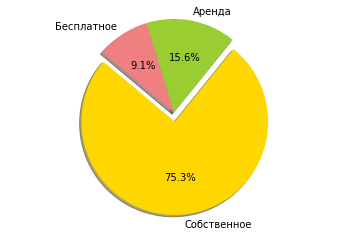

In [70]:
# Строим 2-х мерную гистограмму для визуального анализа
labels = ('Собственное', 'Аренда', 'Бесплатное')
sizes = [own_house_good.value_counts()[0], rent_house_good.value_counts()[0], free_house_good.value_counts()[0]]
colors = ['gold', 'yellowgreen', 'lightcoral']
explode = (0.1, 0, 0)  # смещаем нулевой клин на 0.1 радиуса от остальных


plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

Вывод: В основном клиенты, которые классифицируются как клиенты с хорошим риском, имеют собственный дом. Доля этих клиентов по сравнению с остальными 75,3%.

## Проверим гипотезу: классифицируются ли клиенты как плохие в основном из-за владения собственным жильем

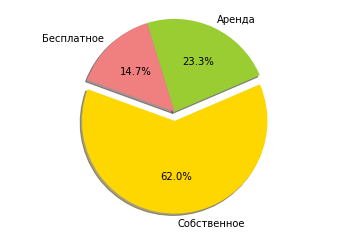

In [86]:
# Клиенты, кто собственник жилья и кто имеет плохой уровень риска
own_house_bad = data[(data.risk == 'bad') & (data.housing == 'own' )].housing

# Клиенты, кто арендует жилье и кто имеет плохой уровень риска
rent_house_bad = data[(data.risk == 'bad') & (data.housing == 'rent' )].housing

# Клиенты, кто бесплатно живет и кто имеет плохой уровень риска
free_house_bad = data[(data.risk == 'bad') & (data.housing == 'free' )].housing

# Строим гистограмму для визуального анализа
labels = ('Собственное', 'Аренда', 'Бесплатное')
sizes = [own_house_bad.value_counts()[0], rent_house_bad.value_counts()[0],free_house_bad.value_counts()[0]]
colors = ['gold', 'yellowgreen', 'lightcoral']
explode = (0.1, 0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=160)

plt.axis('equal')
plt.show()

В основном клиенты, которые классифицируются плохим риском, имеют собственный дом с процентной долей 62,0%. Здесь стоит отметить, что собственников жилья 713, то есть их доля наибольшая среди всех клиентов (1000), поэтому им скорее всего будут чаще присваивать хороший рейтинг, но также и плохой, что мы и видим.

## Найдем наиболее предпочтительные цели кредита

In [82]:
purpose_freq = data[["purpose"]].value_counts()
purpose_freq

purpose            
car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
domestic appliances     12
vacation/others         12
dtype: int64

Цель автокредитования - это основная цель кредита в наборе данных.

## Сколько клиентов, которые классифицируются как хороший / плохой риск, которые хотят получить кредит на автомобиль?

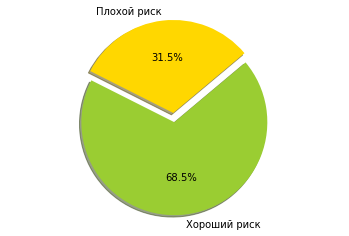

231 клиентов, которые классифицировались как хорошие, у которых цель - автокредитование, их доля: 68,5%
106 клиентов, которые классифицировались как плохие, у которых цель - автокредитование, их доля: 31,5%


In [89]:
data_purpose_car = data[data.purpose == 'car'].groupby(by='risk').risk.value_counts()

# Строим гистограмму для визуального анализа
labels = ('Плохой риск', 'Хороший риск')
sizes = [data_purpose_car[0], data_purpose_car[1]]
colors = ['gold', 'yellowgreen']
explode = (0.1, 0) 

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=40)

plt.axis('equal')
plt.show()

print(f'{data_purpose_car[1]} клиентов, которые классифицировались как хорошие, у которых цель - автокредитование, их доля: 68,5%')
print(f'{data_purpose_car[0]} клиентов, которые классифицировались как плохие, у которых цель - автокредитование, их доля: 31,5%')

## Средняя продолжительность кредита в наборе данных

In [98]:
mean_loan = data.duration.mean()

print(f'Средняя продолжительность кредита {int(round(mean_loan))} месяц')

Средняя продолжительность кредита 21 месяц


## Средняя продолжительность кредита для плохого / хорошего риска

In [104]:
mean_loan_good = data[data.risk == 'good'].duration.mean()
mean_loan_bad = data[data.risk == 'bad'].duration.mean()

print(f'Средняя продолжительность кредита для хорошего риска {round(mean_loan_good, 1)} месяцев')
print(f'Средняя продолжительность кредита для плохого риска {round(mean_loan_bad, 1)} месяцев')

Средняя продолжительность кредита для хорошего риска 19.2 месяцев
Средняя продолжительность кредита для плохого риска 24.9 месяцев


## Максимальный и минимальный срок кредита

In [107]:
max_loan = data.duration.max()
min_loan = data.duration.min()

print(f'Максимальный срок кредита {max_loan} месяцев')
print(f'Минимальный срок кредита {min_loan} месяцев')

Максимальный срок кредита 72 месяцев
Минимальный срок кредита 4 месяцев


## Количество клиентов, которые имеют хороший риск по признаку пола

In [117]:
male_risk_good = data[(data.sex == 'male') & (data.risk == 'good')].sex.value_counts()
female_risk_good = data[(data.sex == 'female') & (data.risk == 'good')].sex.value_counts()

print(f'{male_risk_good[0]} мужчин с хорошем уровнем риска')
print(f'{female_risk_good[0]} женщин с хорошем уровнем риска')

499 мужчин с хорошем уровнем риска
201 женщин с хорошем уровнем риска


## Какие клиенты чаще всего класссифицируются как хорошие / плохие по признаку работы

In [112]:
job_good = data[data.risk == 'good'].job.value_counts()
job_bad = data[data.risk == 'bad'].job.value_counts()

job_good

2    444
1    144
3     97
0     15
Name: job, dtype: int64

In [113]:
print('Большинство клиентов с хорошим риском - это квалифицированные')

Большинство клиентов с хорошим риском - это квалифицированные


In [114]:
job_bad

2    186
1     56
3     51
0      7
Name: job, dtype: int64

In [115]:
print('Большинство клиентов с плохим риском - это квалифицированные')

Большинство клиентов с плохим риском - это квалифицированные


## Основная цель кредита для клиентов с плохим риском

In [116]:
bad_purpose = data[data.risk == 'bad'].purpose.value_counts()
bad_purpose

car                    106
radio/TV                62
furniture/equipment     58
business                34
education               23
repairs                  8
vacation/others          5
domestic appliances      4
Name: purpose, dtype: int64

Большинство клиентов, которые классифицируются как плохие клиенты, - это автокредиты с частотой 106

## Сделаем anova тест для проверки нулевой гипотезы о равенстве средних credit_amount для групп purpose (то есть хотим проверить гипотезу о том, что в среднем сумма выданных кредитов распределена равномерно в зависимости от цели кредита)

In [123]:
from scipy import stats

df1 = data.copy()

df1 = df1[["credit_amount","purpose"]]

group = pd.unique(df1.purpose.values)

d_v1 = {grp:df1["credit_amount"][df1.purpose == grp] for grp in group}

In [127]:
stats.levene(d_v1['radio/TV'],d_v1['furniture/equipment'],d_v1['car'],d_v1['business'],d_v1['domestic appliances'],d_v1['repairs'],
                     d_v1['vacation/others'],d_v1['education'])

LeveneResult(statistic=11.506286350981943, pvalue=4.177745359274538e-14)

In [128]:
f, p = stats.f_oneway(d_v1['radio/TV'],d_v1['furniture/equipment'],d_v1['car'],d_v1['business'],d_v1['domestic appliances'],d_v1['repairs'],
                     d_v1['vacation/others'],d_v1['education'])

("F statistics: "+str(f)+" | P value : "+str(p))

'F statistics: 13.34142171179633 | P value : 1.585947764999813e-16'

### H0: Значимых различий средних по группам нет.

### H1: По крайней мере, среднее значение одной группы отличается.

### P value < 0.05

### Результат: отклоняем нулевую гипотезу

In [129]:
(data.groupby(by=["purpose"])[["credit_amount"]].agg("sum") / data["credit_amount"].sum())*100
# credit_amount в %

,credit_amount
purpose,
business,12.329507
car,38.819347
domestic appliances,0.549513
education,5.192895
furniture/equipment,16.969771
radio/TV,21.292818
repairs,1.834707
vacation/others,3.011441


В результате между группами наблюдается различие.
В dataframe, полученным сверху, видна разница.